## Loading necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

#### Function to calculate metric


In [ ]:
def calculate_datarate(angles,estimate):
    indi=np.log2(1+(np.square(np.abs(estimate@angles)))*(np.square(transmit_).sum())/10**-14)
    return np.sum(indi)*(10**6)

## Estimates

In [ ]:
e2=np.load("estimate_d2.npy")
est_new=np.load("estimate_new_d2.npy")

## Corrcoeff

array([[ 1.        , -0.19778268,  0.04694028, ..., -0.02827723,
         0.05555238,  0.03963231],
       [-0.19778268,  1.        ,  0.4981427 , ..., -0.01856804,
        -0.04015769, -0.01273068],
       [ 0.04694028,  0.4981427 ,  1.        , ..., -0.07020159,
         0.00432821,  0.01478411],
       ...,
       [-0.02827723, -0.01856804, -0.07020159, ...,  1.        ,
         0.08400313,  0.01150082],
       [ 0.05555238, -0.04015769,  0.00432821, ...,  0.08400313,
         1.        ,  0.01803259],
       [ 0.03963231, -0.01273068,  0.01478411, ...,  0.01150082,
         0.01803259,  1.        ]])

In [ ]:
(np.where(np.corrcoef(np.abs(est_new[2][:,1:]),rowvar=False)>=0.2)[0].shape[0] - 4096)/2

434.0

## Vector based method

In [ ]:
def return_coefficients(h_,opt,angle=np.pi/2):
    angles=np.abs(np.angle(h_/opt))
    coeffs=np.ones(1)*-1
    coeffs[(angles<=angle)]=1
    return coeffs

In [ ]:
def return_coefficients_init(h_,n=4):
    init=np.exp(1j*(((2*np.arange(n)-1)/n) *np.pi))
    angles=np.abs(np.angle(h_/init))
    coeffs=np.ones(n)*-1
    
    coeffs[(angles<=np.pi/2)]=1
    
    return coeffs

In [ ]:
return_coefficients_init(1-1j)

array([ 1.,  1., -1., -1.])

In [ ]:
def return_optimal_estimate_vectors(estimation_sum,N=4):
    est_max=estimation_sum[np.argmax(np.abs(estimation_sum))]
    angles=np.ones(estimation_sum.shape[0])*-1
    angles[0]=1
    
    for i in range(1,angles.shape[0]-1):
        angles[i]=return_coefficients(estimation_sum[i],est_max)
        est_max+=angles[i]*estimation_sum[i]
    return angles[:]

In [ ]:
soln=np.zeros((50,4097))
for i in range(50):
    soln[i]=return_optimal_estimate_vectors(e2[i].sum(axis=0))

In [ ]:
def return_optimal_estimate(estimation_sum,N=4,weak=False):
    opt=np.zeros((estimation_sum.shape[0],N),dtype=np.complex)
    angles=np.ones((estimation_sum.shape[0],N))
    if weak==False:
        opt[0]=estimation_sum[0]*return_coefficients_init(estimation_sum[0],N)
    for i in range(opt.shape[0]-1):
        angles[i+1]=return_coefficients_init(estimation_sum[i+1],N)
        opt[i+1]=opt[i]+estimation_sum[i+1]*angles[i+1]
        
    abso=np.abs(opt[-1])
    opt_angle=angles[:,np.where((angles[0,:]==1) &(abso==np.max(abso)))[0]][:,0].flatten()
    return opt_angle


In [ ]:
def return_optimal_estimate(estimation_sum,N=4):
    opt=np.zeros((estimation_sum.shape[0],N),dtype=np.complex)
    angles=np.ones((estimation_sum.shape[0],N))
    angles[0]=return_coefficients_init(estimation_sum[0],N)
    opt[0]=estimation_sum[0]*return_coefficients_init(estimation_sum[0],N)
    for i in range(opt.shape[0]-1):
        angles[i+1]=return_coefficients_init(estimation_sum[i+1],N)
        opt[i+1]=opt[i]+estimation_sum[i+1]*angles[i+1]
        
    abso=np.abs(opt[-1])
    opt_angle=angles[:,np.where((angles[0,:]==1) &(abso==np.max(abso)))[0]][:,0].flatten()
    return opt_angle


In [ ]:
return_optimal_estimate(estimation_[2].sum(axis=0),4096)

array([ 1.,  1.,  1., ..., -1., -1.,  1.])

In [ ]:
def return_optimal_estimate_vectors(estimation_sum,N=4):
    est_max=estimation_sum[np.argmax(np.abs(estimation_sum))]
    angles=np.ones(estimation_sum.shape[0])*-1
    angles[0]=1
    
    for i in range(1,angles.shape[0]-1):
        angles[i]=return_coefficients(estimation_sum[i],est_max,angle=6*np.pi/14)
        est_max+=angles[i]*estimation_sum[i]
    return angles[:]

In [ ]:
a1=return_optimal_estimate(e2[2].sum(axis=0),300)
a2=return_optimal_estimate_vectors(e2[2].sum(axis=0))

In [ ]:
(a1*e2[2].sum(axis=0)).sum(),(a2*e2[2].sum(axis=0)).sum()

((2.2061784958345906e-07+1.0802810243890834e-07j),
 (2.2190649651379322e-07+9.301599449005268e-08j))

In [ ]:
calc_metric(estimation_[2],return_optimal_estimate(estimation_[2].sum(axis=0),400))

37.327743617652224

In [ ]:
soln1=np.zeros((50,4097))
for i in range(50):
    soln1[i]=return_optimal_estimate(e2[i].sum(axis=0),100)

KeyboardInterrupt: 

# Weighted sum over frequencies

In [ ]:
eu2=est_new[2]


In [ ]:
sorted_e=np.argsort(np.abs(eu2),axis=0)[-100:,:]

In [ ]:
np.argsort(np.abs(eu2),axis=0)[-5:,:]

array([[210, 210, 311, ...,  70, 190, 403],
       [208, 208, 291, ..., 186, 283, 178],
       [211, 211, 322, ...,  39, 403, 293],
       [207, 207, 319, ..., 295, 216, 202],
       [209, 209, 306, ..., 323, 304, 387]])

In [ ]:
new_e=np.zeros((100,4097),dtype=np.complex)
for i in range(100):
    new_e[i,:]=eu2[sorted_e[i],i]

In [ ]:
eu2[146,0]

(6.153198237181075e-10+1.510808001768229e-10j)

In [ ]:
sorted_e

array([[146, 146, 279, ..., 291, 292, 378],
       [182, 182, 404, ..., 337, 186, 275],
       [242, 242, 358, ..., 378, 113, 316],
       ...,
       [211, 211, 322, ...,  39, 403, 293],
       [207, 207, 319, ..., 295, 216, 202],
       [209, 209, 306, ..., 323, 304, 387]])

In [ ]:
new_e

array([[ 6.15319824e-10+1.51080800e-10j,  6.15319824e-10+1.51080800e-10j,
        -1.43429067e-10+1.41255333e-10j, ...,
        -5.77550968e-11+1.25147031e-10j, -5.47152825e-11+1.26048649e-10j,
         8.05072817e-11+2.54187596e-10j],
       [ 6.13020159e-10-1.64892921e-10j,  6.13020159e-10-1.64892921e-10j,
         1.12276025e-10+2.60283031e-10j, ...,
        -9.63479924e-11+1.89744024e-10j,  6.08558472e-10-2.23744133e-10j,
        -1.72465228e-10+1.32680775e-10j],
       [ 2.26359556e-11-1.32432079e-11j,  2.26359556e-11-1.32432079e-11j,
         2.55167442e-11+2.93392293e-11j, ...,
         3.44388070e-11+1.49377973e-11j, -2.38104270e-11-1.84449397e-11j,
        -1.82867195e-11+4.14180666e-11j],
       ...,
       [-1.79822312e-13+5.00970722e-13j, -1.79822312e-13+5.00970722e-13j,
        -2.72089478e-13+2.35093442e-12j, ...,
        -6.53602553e-13-1.87885324e-12j, -2.51236968e-12-9.05409424e-13j,
         2.67139196e-12-1.04545938e-12j],
       [-1.48929585e-13+2.15560207e-12j, -1.

In [ ]:
angles=np.ones((100,4097))
for i in range(100):
    if(i%10==0):
        print(i)
    angles[i]=return_optimal_estimate(new_e[i],300)


0
10
20
30
40
50
60
70
80
90


In [ ]:
new_angles=(np.abs(new_e)*angles).sum(axis=0)
new_angles[new_angles>0]=1
new_angles[new_angles<=0]=-1

In [ ]:
calc_metric(eu2,new_angles)

34.76856928826468

In [ ]:
eu2=est_new[33]


In [ ]:
time_h[1,0]

(7.719884883191702e-11+9.419128070672383e-11j)

In [ ]:
np.fft.ifft(time_h[1,0].reshape(1,1))

array([[7.71988488e-11+9.41912807e-11j]])

In [ ]:
time_h[1,:].shape

(4097,)

In [ ]:
np.fft.fft([1,2])

array([ 3.+0.j, -1.+0.j])

In [ ]:
np.fft.fft(time_h[1,:]).shape

(4097,)

In [ ]:
n=np.arange(1,20)
for N in n:
    time_h=np.fft.ifft(eu2,500,axis=0)[:N,:]

    angles=np.ones((N,4097))
    for i in range(N):

        angles[i]=return_optimal_estimate(time_h[i,:],300)

    new_angles=(np.abs(time_h)*angles).sum(axis=0)
    new_angles=(angles).sum(axis=0)

    new_angles[new_angles>0]=1
    new_angles[new_angles<=0]=-1
    print(calc_metric(eu2,new_angles))

52.61592746073798
55.89005601860805
43.26737363686473
49.36070520599301
47.71186457473688
47.11661047327196
44.635051866081355
45.74382805547708
46.10019198198343
46.21664542587115
44.02423226732004
45.67964375767809
45.11420327642993
45.26245064878768
44.93692247734758
45.408536016030354
44.31190994257009
44.51912852873817
45.14147041850036


43.455452867629184

### Selecting N taps

In [ ]:
def strongest_tap(est,n=1,m=40,weak=False):
    time_h=np.fft.ifft(est,500,axis=0)[:20,:]
    
    N=est.shape[1]
    strongest_tap=np.argsort(np.abs(time_h),axis=0)[-1*n:,:].reshape(N,n)
    top_time_h=np.zeros((n,N),dtype=np.complex)
    for i in range(N):
        top_time_h[:,i]=time_h[strongest_tap[i],i]
    h=np.fft.fft(top_time_h,500,axis=0)
    if weak==False:
        theta=return_optimal_estimate(h.sum(axis=0),m)
    else:
        theta=return_optimal_estimate(h.sum(axis=0),40)
    return theta

In [ ]:
def 

In [ ]:
for i in range(1,20,1):
    print(calc_metric(estimation_[33],strongest_tap(estimation_[33],i,m=10)))

50.159533415952836
42.33558980416348
42.87005062914494
35.04170038262199
32.81602160642974
25.10221786746689
29.505949676925702
21.902581678547794
23.798194852047764
28.571188746006193
24.855272813382275
25.36040102069371
22.140158999472384
25.102466466310016
21.718511153061616
22.532476125395057
20.923229028474882
22.222475922759223
23.165254491195203


array([29, 31,  6, 37, 15,  5, 39, 34, 44, 33, 10, 21,  2, 32])

In [ ]:
weak_users=

In [ ]:
soln3=np.zeros((50,4096))
for i in range(50):
    soln3[i]=strongest_tap(estimation_[i],1,m=40)
    

In [ ]:
soln3

array([[ 1.,  1.,  1., ...,  1., -1., -1.],
       [ 1.,  1.,  1., ..., -1., -1.,  1.],
       [ 1., -1., -1., ..., -1.,  1., -1.],
       ...,
       [ 1.,  1., -1., ...,  1., -1., -1.],
       [ 1., -1., -1., ..., -1.,  1., -1.],
       [ 1., -1.,  1., ...,  1., -1., -1.]])

## Gradient Search Solutions

In [ ]:
soln2=np.load("dataset2_soln.npy")

In [ ]:
metric=np.zeros((5,50))

In [ ]:
def calc_metric(est,angle):
    return np.sum(np.log2(1+(np.square(np.abs(est@angle))*10**-3/10**-22/0.65))*(10**7/481))/10**6

In [ ]:
def calc_overall(metric_):
    metric_=metric_.copy()
    metric_[np.argsort(metric_)[:14]]*=2
    return  metric_.mean()

In [ ]:
for i in range(50):
    metric[0,i]=calc_metric(e2[i],soln[i])
    metric[1,i]=calc_metric(e2[i],soln1[i])
    metric[2,i]=calc_metric(e2[i],soln2[i])
    metric[3,i]=calc_metric(est_new[i],soln3[i])


In [ ]:
metric[2][33]

61.82535758066819

In [ ]:
metric[3][33]

47.866984741535454

In [ ]:
for i in range(50):
    #metric[0,i]=calc_metric(est_new[i],soln[i])
    #metric[1,i]=calc_metric(est_new[i],soln1[i])
    metric[2,i]=calc_metric(estimation_[i],soln2[i,1:])
    metric[3,i]=calc_metric(estimation_[i],soln3[i])
  #  metric[4,i]=calc_metric(est_new[i],flipping(est_new[i],soln3[i]))

In [ ]:
def flipping(est,theta):
    new_theta=theta.copy()
    comp_theta=theta.copy()
    for i in range(1,4097):
        new_theta[i]*=-1
        if(calc_metric(est,new_theta)>calc_metric(est,comp_theta)):
            comp_theta[i]*=-1
        else:
            new_theta[i]*=-1
    return comp_theta

66.55982489208428

In [ ]:
metric[2][33]

63.33679911301675

In [ ]:
weak_user=est_new[2]

In [ ]:
calc_overall(metric[2]),calc_overall(metric[3])#,calc_overall(metric[4])

(115.31459871794195, 110.71792376183572)

In [ ]:
np.argmax(metric[2]-metric[3])

33

In [ ]:
plt.plot(np.arange(500),)

array([ 6, 15, 31, 39, 29, 44, 34, 37,  5, 10, 33, 32,  2, 21])

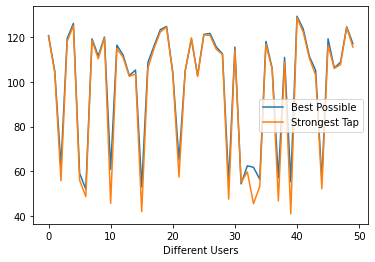

In [ ]:
x=np.arange(50)
#plt.plot(x,metric[0,:],label="Vector")
#plt.plot(x,metric[1,:],label="Vector 2")

plt.plot(x,metric[2,:],label="Best Possible")

plt.plot(x,metric[3,:],label="Strongest Tap")
plt.xlabel("Different Users")
plt.legend()

## Gradient Search Solutions

In [ ]:
soln=np.load("new_vec_dataset2_soln.npy")
soln1 = scipy.io.loadmat('test.mat')

In [ ]:
(soln1['theta'].T==soln[:,1:]).sum()/4096

50.0

In [ ]:
metric=np.zeros((2,50))

In [ ]:
def calc_metric(est,angle):
    return np.sum(np.log2(1+(np.square(np.abs(est@angle))*10**-3/10**-22/0.65))*(10**7/481))/10**6

In [ ]:
def calc_overall(metric_):
    metric_=metric_.copy()
    metric_[metric_<100]*=2
    return  metric_.mean()

In [ ]:
for i in range(50):
    metric[0,i]=calc_metric(est_new[i],soln['theta'][i])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 50 is different from 4097)

In [ ]:
calc_overall(metric[0])

117.75925438019047

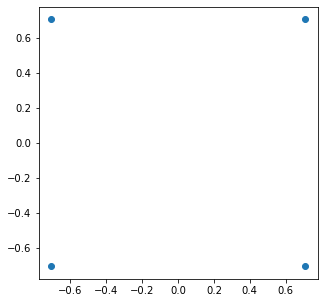

In [ ]:
plt.figure(figsize=(5,5))
n=4
init=np.exp(1j*(((2*np.arange(n)-1)/n) *np.pi))
plt.scatter(np.real(init),np.imag(init))

In [ ]:
init/e2[0].sum(axis=0)

ValueError: operands could not be broadcast together with shapes (4,) (4097,) 

In [ ]:
np.angle()

In [ ]:
np.degrees(np.angle((1-1j)/1j))

-135.0

In [ ]:
calc_overall(metric[0,:])

115.0548765275311

In [ ]:
scipy.io.savemat('test.mat', {'theta': soln[:,1:].T})

In [ ]:
def return_coefficient(h_,opt):
    angles=-np.angle(h_/opt)
    coeffs=np.ones(1)*-1
    coeffs[(angles<np.pi/2) & (angles>-np.pi/2)]=1
    return coeffs

In [ ]:
def return_coefficients(h_,opt):
    angles=-np.angle(h_/opt)
    coeffs=np.ones(h_.shape[0])*-1
    coeffs[(angles<np.pi/2) & (angles>-np.pi/2)]=1
    return coeffs

In [ ]:
def return_coefficients_init(h_,n=4):
    init=np.exp(1j*(((2*np.arange(n)-1)/n) *np.pi))

    angles=np.angle(init/h_)
    coeffs=np.ones(n)*-1
    coeffs[(angles<np.pi/2) & (angles>-np.pi/2)]=1
    return coeffs

In [ ]:
def return_optimal_estimate_max(estimation_sum,N=4):
    est_max=estimation_sum[np.argmax(np.abs(estimation_sum))]
    opt_angles=return_coefficients(estimation_sum,est_max)
    return opt_angles

In [ ]:
def return_optimal_estimate_vectors(estimation_sum,N=4):
    est_max=estimation_sum[np.argmax(np.abs(estimation_sum))]
    angles=np.ones(4097)*-1
    angles[0]=1
    
    for i in range(1,angles.shape[0]-1):
        angles[i]=return_coefficient(estimation_sum[i],est_max)
        est_max+=angles[i]*estimation_sum[i]
    return angles

In [ ]:
def return_optimal_estimate(estimation_sum,N=4):
    opt=np.zeros((estimation_sum.shape[0],N),dtype=np.complex)
    angles=np.ones((estimation_sum.shape[0],N))
    opt[0]=estimation_sum[0]*return_coefficients_init(estimation_sum[0],N)
    for i in range(opt.shape[0]-1):
        angles[i]=return_coefficients_init(estimation_sum[i+1],N)
        opt[i+1]=opt[i]+estimation_sum[i+1]*angles[i]
    return opt,angles

In [ ]:
def extract_opt(opt,angles):
    abso=np.abs(opt[-1])
    opt_angle=angles[:,np.where((angles[0,:]==1) &(abso==np.max(abso)))[0]][:,0].flatten()
    return opt_angle

In [ ]:
def calculate_datarate(angles,estimate):
    indi=np.log2(1+(np.square(np.abs(estimate@angles)))*(np.square(transmit_).sum())/10**-14)
    return np.sum(indi)*10**6

In [ ]:
def calculate_datarate_indi(angles,estimate):
    return np.log2(1+(np.square(np.abs(estimate@angles)))*(np.square(transmit_).sum())/10**-14)

### Load data

In [ ]:
# mat = scipy.io.loadmat('../input/sp-cup-2021-dataset/dataset1.mat')
mat = scipy.io.loadmat('dataset1.mat')

In [ ]:
pilot_=mat['pilotMatrix4N']
received_=mat['receivedSignal4N']
transmit_=mat['transmitSignal']

print("Shape of pilot: ",pilot_.shape)
print("Shape of received signal: ",received_.shape)
print("Shape of transmitted signal: ",transmit_.shape)

Shape of pilot:  (4096, 16384)
Shape of received signal:  (500, 16384)
Shape of transmitted signal:  (500, 1)


In [ ]:
pilot_

array([[ 1,  1,  1, ...,  1,  1, -1],
       [ 1, -1,  1, ..., -1,  1,  1],
       [ 1,  1, -1, ...,  1, -1,  1],
       ...,
       [ 1, -1,  1, ..., -1,  1,  1],
       [ 1,  1, -1, ...,  1, -1,  1],
       [ 1, -1, -1, ..., -1, -1, -1]], dtype=int16)

In [ ]:
transmit_.sum()

0.158113883008419

# Time Domain based Estimation

In [ ]:
e1=np.load("estimate_d1.npy")

In [ ]:
e1=e2[2]
time_h=np.fft.ifft(e1,500,axis=0)

n=20
strongest_tap=np.argsort(np.abs(time_h),axis=0)[-1*n:,:].reshape(4097,n)
#strongest_tap=np.argmax(np.abs(time_h),axis=0)
top_time_h=np.zeros((n,4097),dtype=np.complex)

for i in range(4097):
    top_time_h[:,i]=time_h[strongest_tap[i],i]

h=np.fft.fft(top_time_h,500,axis=0)


In [ ]:
h.shape

(500, 4097)

In [ ]:
opt=return_optimal_estimate_vectors(h.sum(axis=0))
calculate_datarate(opt,e1)

3.7973834959388615

In [ ]:
opt,angles=return_optimal_estimate(h.sum(axis=0),4)
opt_angles=extract_opt(opt,angles)
calculate_datarate(opt_angles,e1)

2.273644869919815

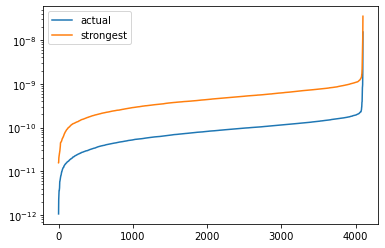

In [ ]:
plt.plot(np.arange(4097),np.sort(np.abs(e1.sum(axis=0))),label="actual")
plt.plot(np.arange(4097),np.sort(np.abs(h.sum(axis=0))),label='strongest')
plt.legend()
plt.yscale('log')

In [ ]:
h.shape

(500, 4097)

In [ ]:
np.fft(np.argmax(np.abs())),

3.468564512040652e-10

## Channel estimation

$R_{Kx1} = G_{KxN}*\theta_{Nx1}$

In [ ]:
pilots_final = np.concatenate([np.ones((1,16384)),pilot_])

In [ ]:
pilots_final.shape

(4097, 16384)

In [ ]:
estimation_ = received_@np.linalg.pinv(pilots_final)

In [ ]:
estimation_.shape

(500, 4097)

In [ ]:
np.save("estimate_d1.npy",estimation_)

In [ ]:
estimation_.shape

(500, 4097)

## Phase Delay estimation

In [ ]:
angles = np.angle(estimation_.sum(axis=0))

In [ ]:
angles.shape

(4097,)

In [ ]:
deviation = (angles - angles[0])%(2*np.pi)

In [ ]:
deviation.shape

(4097,)

In [ ]:
theta=np.ones((4097,1))*-1
theta[np.where((deviation<np.pi/2)|(deviation>3*np.pi/2))]=1

In [ ]:
theta.shape

(4097, 1)

## Objective function

Direct

In [ ]:
np.sum(np.log2(1+(np.square(np.abs(estimation_[:,0])).sum())*(np.square(transmit_).sum())/10**-14))*10**6

0.6517972413460812

All channels

In [ ]:
np.sum(np.log2(1+(np.square(np.abs(estimation_@theta)).sum())*(np.square(transmit_).sum())/10**-14))*10**6

476.8929341180624

In [ ]:
theta=np.ones((4097,1))

In [ ]:
np.sum(np.log2(1+(np.square(np.abs(estimation_@theta)).sum())*(np.square(transmit_).sum())/10**-14))*10**6

0.6894651151300758

In [ ]:
theta[1:] = -1

In [ ]:
np.sum(np.log2(1+(np.square(np.abs(estimation_@theta)).sum())*(np.square(transmit_).sum())/10**-10))*10**9

0.14782211601096626

# Multi User

In [ ]:
mat1 = scipy.io.loadmat('dataset2.mat')

In [ ]:
pilot_=mat1['pilotMatrix']
received_=mat1['receivedSignal']
transmit_ = mat1['transmitSignal']

print("Shape of pilot: ",pilot_.shape)
print("Shape of received signal: ",received_.shape)
print("Shape of transmitted signal: ",transmit_.shape)

Shape of pilot:  (4096, 4096)
Shape of received signal:  (500, 4096, 50)
Shape of transmitted signal:  (500, 1)


In [ ]:
pilots_final = np.concatenate([np.ones((1,pilot_.shape[1])),pilot_])

In [ ]:
pilots_final.shape

(4097, 4096)

In [ ]:
p_inv=np.linalg.pinv(pilots_final)

In [ ]:
p_inv.shape

(4096, 4097)

In [ ]:
estimation_=np.transpose(received_,axes=(2,0,1))@p_inv

In [ ]:
np.save("estimate_d2.npy",estimation_)

In [ ]:
pilots_first=np.ones((1,4096))
pf_inv=np.linalg.pinv(pilots_first)
estimation_d=np.transpose(received_,axes=(2,0,1))@pf_inv

In [ ]:
pr_inv=np.linalg.pinv(pilot_)
estimation_rest=(np.transpose(received_,axes=(2,0,1))-(estimation_d*transmit_[0]))@pr_inv

In [ ]:
est_new=np.concatenate([estimation_d,estimation_rest],axis=2)

In [ ]:
np.save('estimate_new_d2.npy',est_new)

In [ ]:
po_inv=np.linalg.pinv(pilot_)
estimation_=(np.transpose(received_,axes=(2,0,1)))@po_inv

In [ ]:
np.save('estimate_only_d2.npy',estimation_)

In [ ]:
estimation_d.shape,estimation_rest.shape

((50, 500, 1), (50, 500, 4096))

In [ ]:
estimation_.shape

(50, 500, 4097)

In [ ]:
estimation_sums=estimation_.sum(axis=1)

NameError: name 'estimation_' is not defined

In [ ]:
deviation = (angles - angles[:,0].reshape(50,1))%(2*np.pi)

In [ ]:
theta=np.ones((50,4097))*-1
theta[np.where((deviation<np.pi/2)|(deviation>3*np.pi/2))]=1

In [ ]:
theta.shape,estimation_.shape


((50, 4097), (50, 500, 4097))

In [ ]:
estimation_[]

In [ ]:
tot=np.zeros(50)
for i in range(50):
    tot[i]=np.sum(np.log2(1+(np.square(np.abs(estimation_[i]@theta[i])).sum())*(np.square(transmit_).sum())/10**-14))*10**6


In [ ]:
estimation_sum=estimation_.sum(axis=0)

In [ ]:
opt=np.zeros((4097,4),dtype=np.complex)
init=[np.exp(1j*np.pi/4),np.exp(1j*3*np.pi/4),np.exp(1j*5*np.pi/4),np.exp(1j*7*np.pi/4)]
angles=np.zeros((4097,4))
opt[0]=estimation_sum[1]*return_coefficients(estimation_sum[1],init)
for i in range(opt.shape[0]-1):
    angles[i]=return_coefficients(estimation_sum[i+1],opt[i])
    opt[i+1]=opt[i]+estimation_sum[i+1]*angles[i]

In [ ]:
opt=np.zeros((4097,4),dtype=np.complex)
init=[np.exp(1j*np.pi/4),np.exp(1j*3*np.pi/4),np.exp(1j*5*np.pi/4),np.exp(1j*7*np.pi/4)]
angles=np.zeros((4097,4))
opt[0]=estimation_sum[0]*return_coefficients_init(estimation_sum[0],init)
for i in range(opt.shape[0]-1):
    angles[i]=return_coefficients_init(estimation_sum[i+1],init)
    opt[i+1]=opt[i]+estimation_sum[i+1]*angles[i]

(500,)


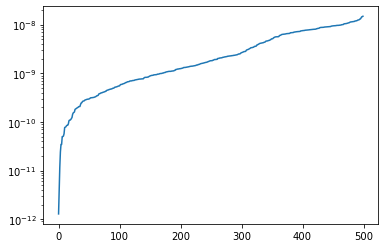

In [ ]:
plt.plot(np.arange(500),np.sort(calculate_datarate_indi(opt_angle,e2[2])))
plt.yscale('log')

In [ ]:
opt,angles=return_optimal_estimate(e2[2].sum(axis=0),60000)
opt_angle=extract_opt(opt,angles)
calculate_datarate(opt_angle,e2[2])
#datarates[i]=calculate_datarate(opt_angle,estimation_[i])

1.9403305964214577

In [ ]:
opt_angle[np.argsort(np.abs(e1.sum(axis=0)))[:-400]]=0

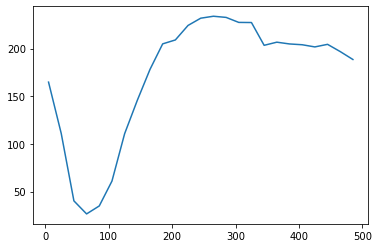

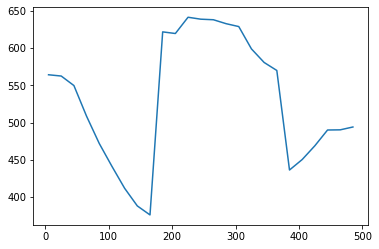

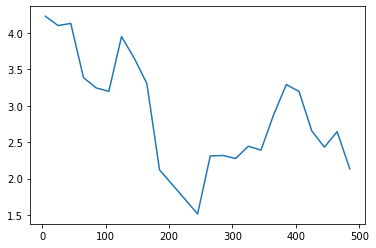

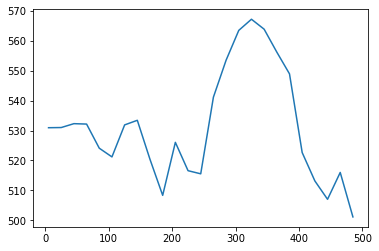

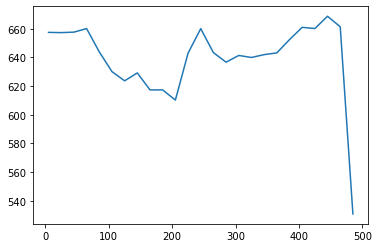

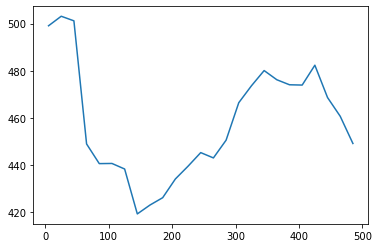

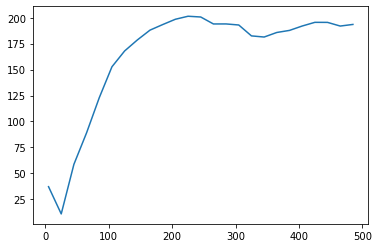

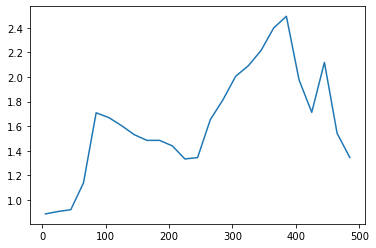

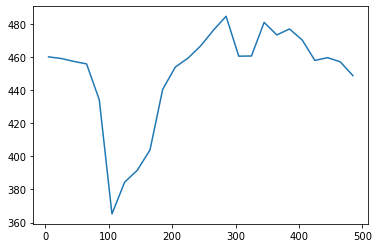

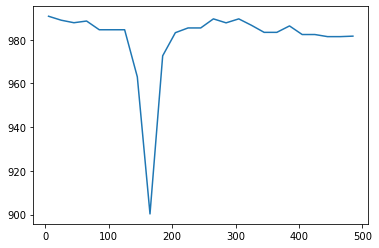

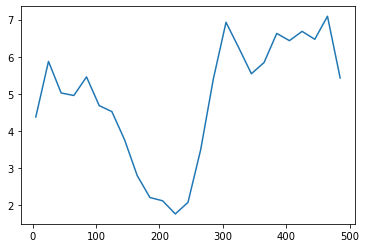

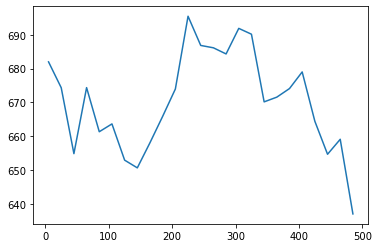

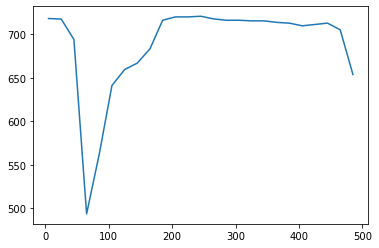

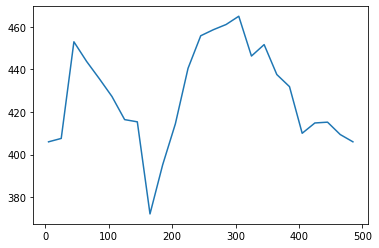

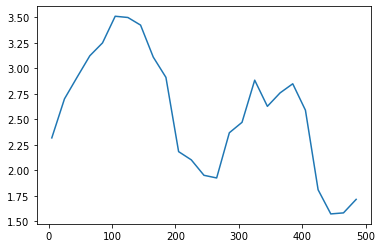

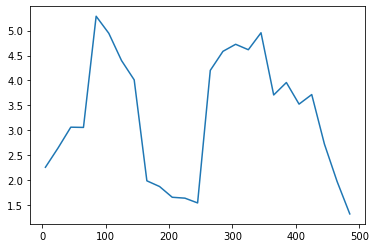

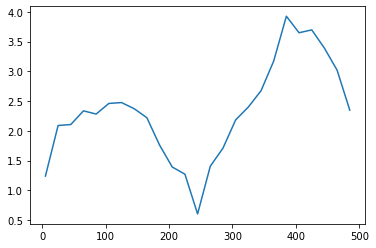

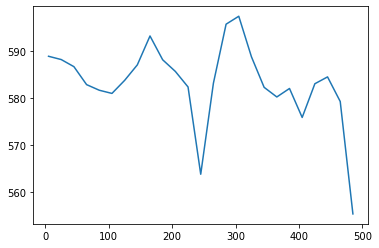

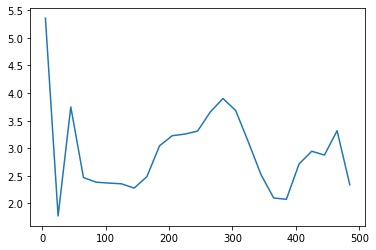

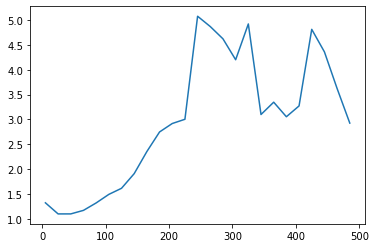

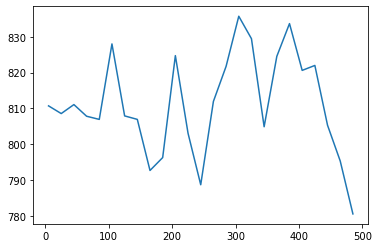

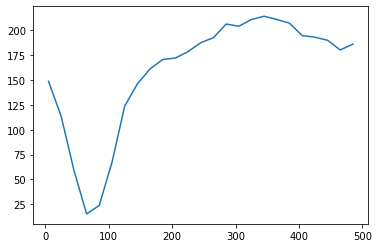

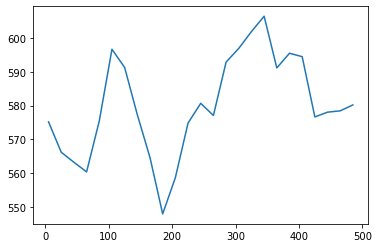

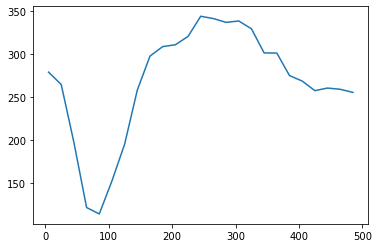

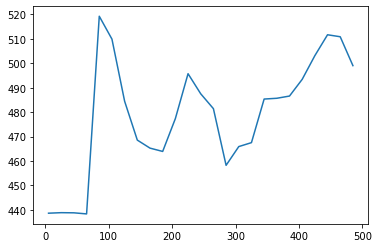

In [ ]:
ms=np.arange(5,495,20)
for U in range(1,50,2):
    datarates=np.zeros(ms.shape[0])
    for i in range(ms.shape[0]):
    
        e1_best=np.argsort((e2[U].sum(axis=1))[ms[i]:])
        e1_sum=e2[U,e1_best,:].sum(axis=0)
        opt,angles=return_optimal_estimate(e1_sum)
        opt_angle=extract_opt(opt,angles)
        datarates[i]=calculate_datarate(opt_angle,e2[U])
    plt.plot(ms,datarates)
    plt.show()
    

In [ ]:
opt_angle.shape

(4097,)

In [ ]:
opt_angle=np.zeros(4097)
U=2
for i in range(500):
    e1_sum=e2[U,i,:]
    opt,angles=return_optimal_estimate(e1_sum)
    opt_angle+=np.abs(e1_sum)*extract_opt(opt,angles)
    

In [ ]:
opt_angle[opt_angle>=0]=1
opt_angle[opt_angle<0]=-1


In [ ]:
calculate_datarate(opt_angle,e2[U])

3.526777112500573

In [ ]:
not True

False

In [ ]:
def top_n(N,estimate):
    estimate_sum=estimate.sum(axis=0)
    
    topornot=np.full(estimate_sum.shape[0],False)
    topornot[np.argsort(np.abs(estimate_sum))[-N:]]=True

    topn_opt,topn_angle=return_optimal_estimate(estimate_sum[topornot])
    oth_opt,oth_angle=return_optimal_estimate(estimate_sum[~topornot])
    angles=np.ones(estimate_sum.shape[0])
    
    opt_ang_topn=extract_opt(topn_opt,topn_angle)
    angles[topornot]=opt_ang_topn
    opt_ang_oth=extract_opt(oth_opt,oth_angle)
    angles[~topornot]=opt_ang_oth
    

    aligned=calculate_datarate(angles,estimate)
    angles[~topornot]=-1*opt_ang_oth

    notaligned=calculate_datarate(angles,estimate)
    return np.array([aligned,notaligned])

In [ ]:
def top_n_vote(N,estimate):
    angle_sums=np.zeros(estimate.shape[1])
    
    angles=np.ones(estimate.shape[1])

    for i in range(10):
        estimate_sum=estimate[i,:]

        topornot=np.full(estimate_sum.shape[0],False)
        topornot[np.argsort(np.abs(estimate_sum))[-N:]]=True

        topn_opt,topn_angle=return_optimal_estimate(estimate_sum[topornot])
        oth_opt,oth_angle=return_optimal_estimate(estimate_sum[~topornot])
      
      
        opt_ang_topn=extract_opt(topn_opt,topn_angle)
        opt_ang_oth=extract_opt(oth_opt,oth_angle)

        angle_sums[topornot]+=opt_ang_topn
        angle_sums[~topornot]+=opt_ang_oth
        aligned=calculate_datarate(angles,estimate_sum)
        notaligned

    
    angles[angle_sums>=0]=1
    angles[angle_sums<0]=-1


    aligned=calculate_datarate(angles,estimate)
    return aligned
#     angles[~topornot]=-1*opt_ang_oth
   
#     notaligned=calculate_datarate(angles,estimate)
#     return np.array([aligned,notaligned])

In [ ]:
top_n_vote(50,e2[2])

0.48700640045881

In [ ]:
user_datarates=np.zeros((50,2))
for U in range(50):
    user_datarates[U]=top_n(50,e2[U])
    print(U)

KeyboardInterrupt: 

In [ ]:
calculate_datarate(opt_angles,e2[2])

107.09183522529496

In [ ]:
ns=np.arange(1,1000,50)
datarates=np.zeros((ns.shape[0],2))
i=0
for n in ns:
    datarates[i]=top_n(n,e2[2])
    i+=1

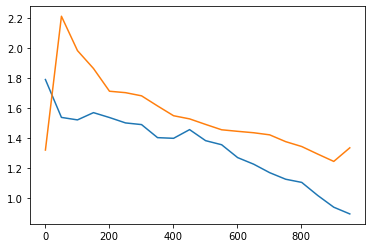

In [ ]:
plt.plot(ns,datarates)

In [ ]:
i=0
datarates=np.zeros(50)
for est_u in estimation_sums:
    opt,angles=return_optimal_estimate(est_u)
    opt_angle=extract_opt(opt,angles)
    datarates[i]=calculate_datarate(opt_angle,estimation_[i])
    
    i+=1

In [ ]:
opt,angles=return_optimal_estimate(estimation_sums[2])
opt_angle=extract_opt(opt,angles)
N=10
for j in range(N):
    for i in range(1,4097):
        temp=opt_angle.copy()
        temp[i]*=-1
        org=calculate_datarate(opt_angle,estimation_[2])
        swap=calculate_datarate(temp,estimation_[2])
        if(org<swap):
            opt_angle[i]*=-1
        

In [ ]:
org

15.300756174072824

array([2.43365735e-13, 1.22587350e-12, 1.53150384e-12, ...,
       1.39456754e-09, 3.53425757e-08, 3.53425757e-08])

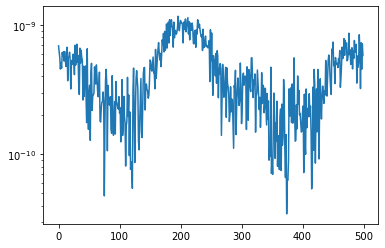

In [ ]:
plt.plot(np.arange(500),np.abs(estimation_[1].sum(axis=1)))
plt.yscale('log')

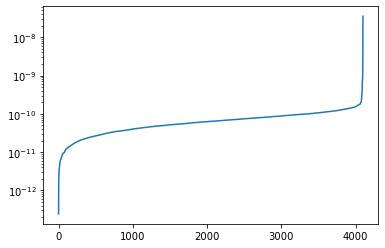

In [ ]:
plt.plot(np.arange(4097),np.sort(np.abs(estimation_[2].sum(axis=0))))
plt.yscale('log')

In [ ]:
estimation_[2].sum(axis=0).shape

(4097,)

In [ ]:
direct_datarates=[]
for e in e2:
    direct_datarates.append(calculate_datarate(np.concatenate(([1],np.zeros(4096))),e))

In [ ]:
allones_datarates=[]
for e in e2:
    allones_datarates.append(calculate_datarate(np.concatenate(([1],np.ones(4096))),e))

In [ ]:
random_datarates=[]
for e in e2:
    random_datarates.append(calculate_datarate(np.concatenate(([1],np.random.choice([1,-1],size=4096))),e))

In [ ]:
vector_datarates=np.array([ 782.3111543 ,  175.01716895,    3.18417189,  610.73840434,
       1116.06585698,    6.59041028,    2.954907  ,  639.38358173,
        389.69286543,  695.17656242,    5.57098151,  540.37860945,
        389.30307424,   73.38014665,  243.11456871,    4.04700756,
        358.66480824,  531.95172616,  885.8324869 ,  994.93594597,
        220.07121225,    3.82276502,  238.06905261,  704.59950965,
        222.14521745,  772.05673472,  753.41203984,  494.94560407,
        435.92173443,    2.93091451,  562.29229144,    4.3682632 ,
          6.05877289,    7.82531377,    3.01875189,  657.25513327,
        242.18577812,    4.39249437,  342.77665691,    2.25611585,
       1315.97875652,  964.51040343,  384.76375499,  206.22708651,
          2.57405132,  680.01034239,  198.99174091,  304.20329115,
        931.37501722,  526.69879589])

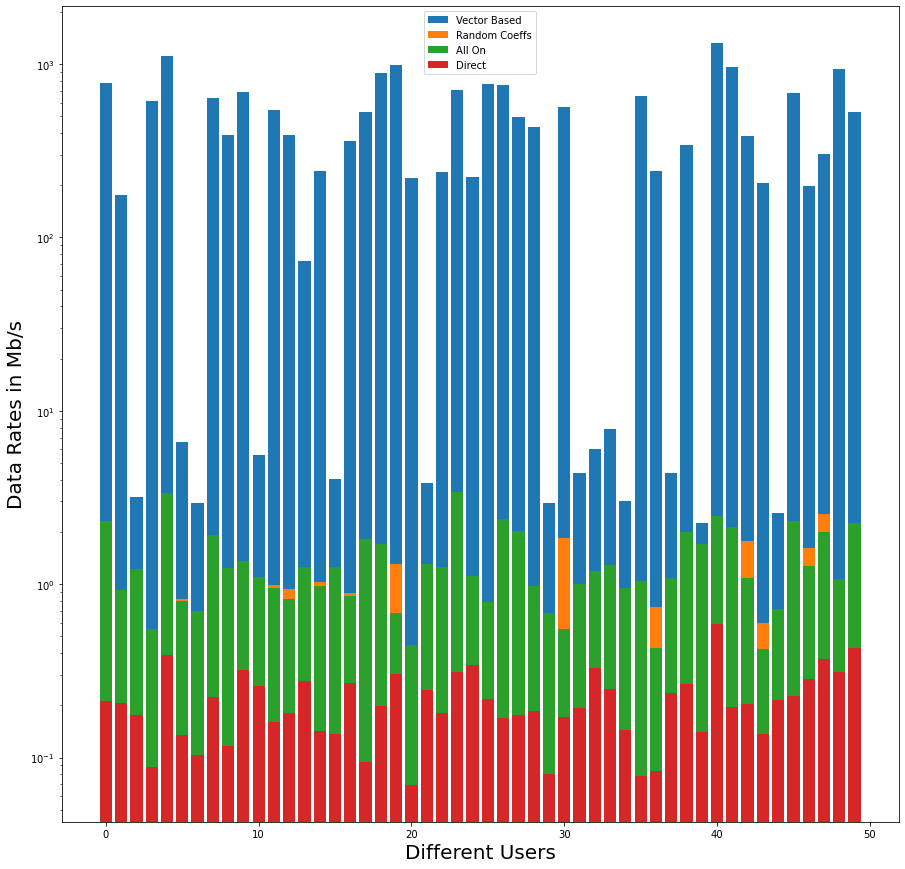

In [ ]:
plt.figure(figsize=(15,15))
users=np.arange(50)
plt.bar(users,vector_datarates,label="Vector Based")
plt.bar(users,random_datarates,label="Random Coeffs")
plt.bar(users,allones_datarates,label="All On")
plt.bar(users,direct_datarates,label="Direct")
plt.legend()
plt.xlabel("Different Users", fontdict={'size':20})
plt.ylabel("Data Rates in Mb/s", fontdict={'size':20})
plt.yscale('log')
plt.savefig("datarates.png")

In [ ]:
datarates[2]

1.788411760736299

In [ ]:
np.argmax(vector_datarates-datarates)

40

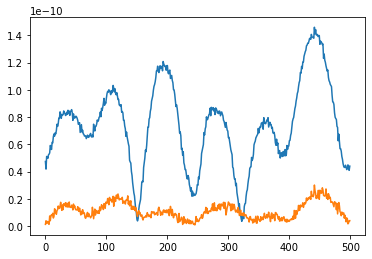

In [ ]:
plt.plot(np.arange(500),np.abs(e[:,2]))
plt.plot(np.arange(500),np.abs(e[:,3]))

In [ ]:
opy

NameError: name 'opy' is not defined

In [ ]:
angles[:,np.where((angles[0,:]==1) &(abso==np.max(abso)))[0]][:,0]

array([ 1., -1.,  1., ...,  1., -1.,  0.])

467.02065216231455

(-3.3306690738754696e-16+5.551115123125783e-16j)

In [ ]:
e1=np.load("estimate_d1.npy")
e2=np.load("estimate_d2.npy")

In [ ]:
e1.shape

(500, 4097)

In [ ]:
def plot_irs_coeff(e):
    
    plt.plot(np.arange(e.shape[1]),np.sort(np.abs(e.sum(axis=0))))
    plt.xlabel('N=4097 Sub Channels',fontdict={'size':14})
    plt.ylabel('Absolute of the Channel Coefficient',fontdict={'size':14})
    plt.yscale('log')

In [ ]:
def plot_sc_coeff(e):
    plt.plot(np.arange(e.shape[0]),np.sort(np.abs(e.sum(axis=1))))
    plt.xlabel('K=500 Subcarriers',fontdict={'size':14})
    plt.ylabel('Absolute of the Channel Coefficient',fontdict={'size':14})
    plt.yscale('log')

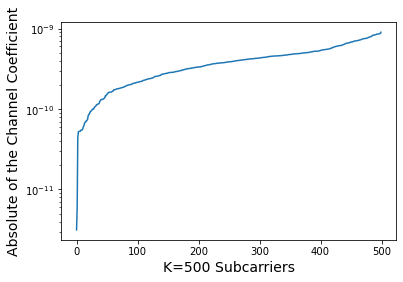

In [ ]:
plt.figure(figsize=(15,15))

plot_sc_coeff(e1)

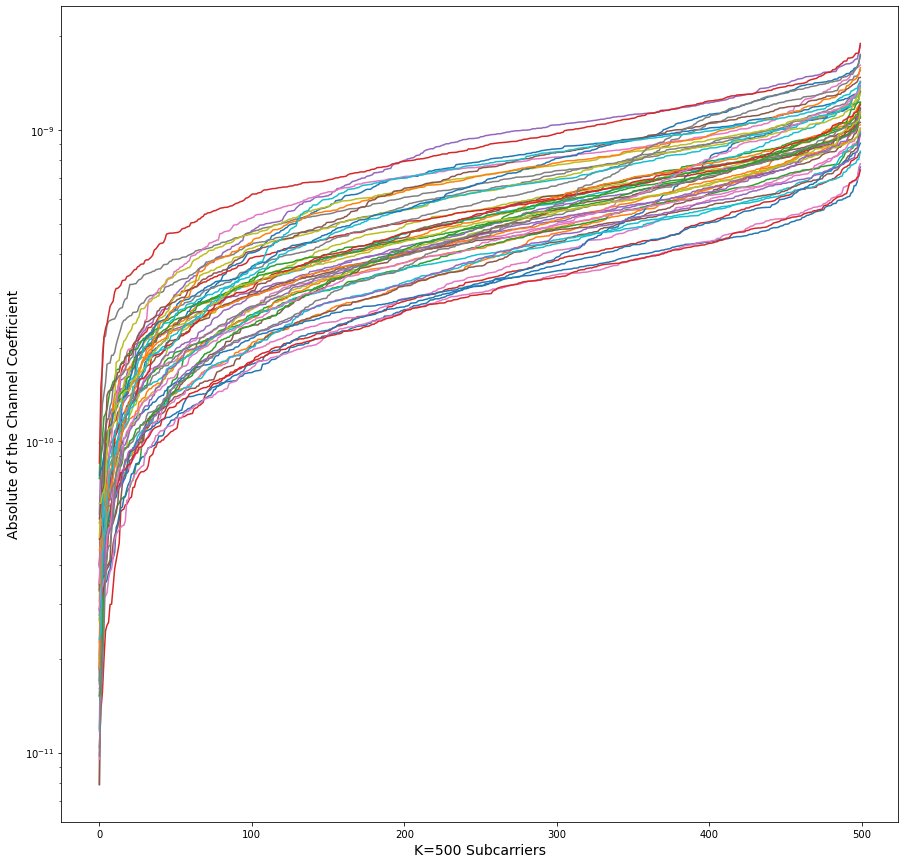

In [ ]:
plt.figure(figsize=(15,15))
for e in e2:
    plot_sc_coeff(e)
plt.savefig("subcarrier.png")

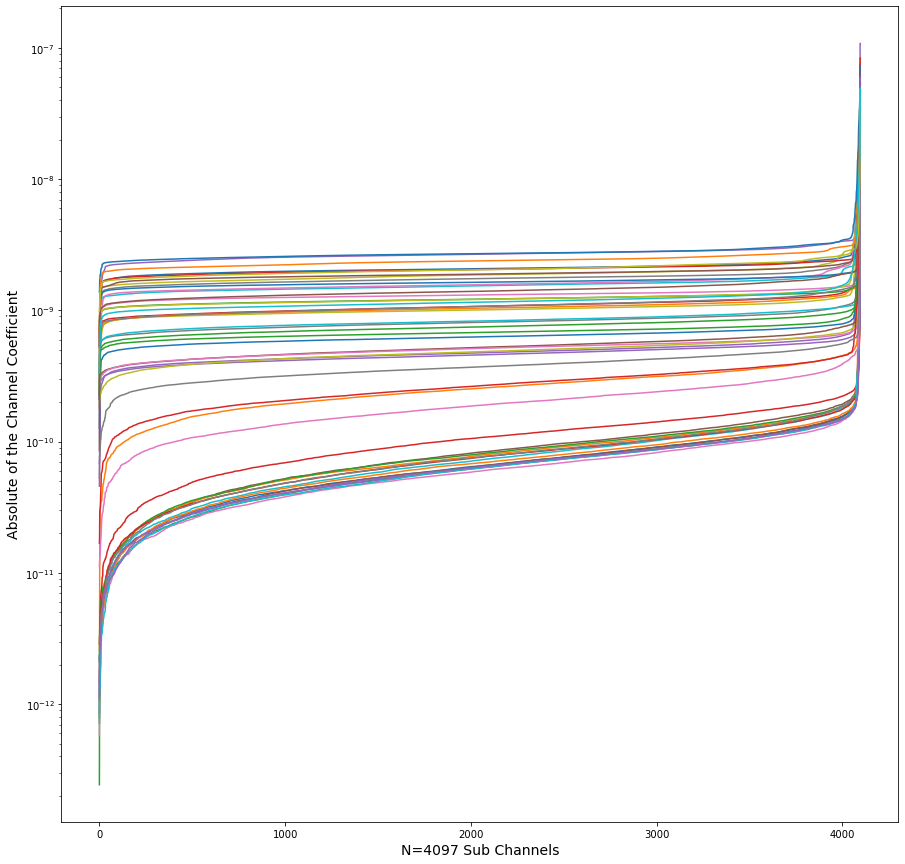

In [ ]:
plt.figure(figsize=(15,15))
for e in e2:
    plot_irs_coeff(e)
plt.savefig("subchannel.png")

In [ ]:
def calc_diff(e,f):
    sort=np.sort(np.abs(e.sum(axis=0)))
    n=int(f*e.shape[1])

    return sort[n:].sum()/sort[:n].sum()

In [ ]:
calc_diff(e1,0.90)

0.15537549721963256

In [ ]:
diffs=np.zeros(50)
i=0
for e in e2:
    diffs[i]=calc_diff(e,0.90)
    i+=1

<StemContainer object of 3 artists>

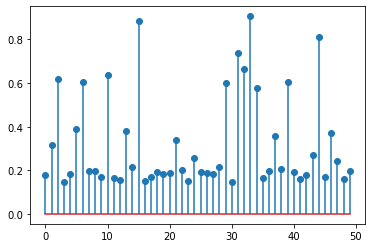

In [ ]:
plt.stem(diffs)
plt.xlabel("Different Users")
plt.ylabel("V")

In [ ]:
np.correlate(np.random.randn(50),np.random.randn(50))

array([4.6317427])

In [ ]:
np.correlate(diffs,vector_datarates)

array([7058.27703889])

In [ ]:
#

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4b319ffc-f2ce-4490-9e28-3a7eb21abad0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>